In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 51
data = {
    "Student_ID": range(1, n+1),
    "Name": [f"Student_{i}" for i in range(1, n+1)],
    "Age": np.random.choice([18,19,20,21,22], size=n),
    "Gender": np.random.choice(["Male", "Female"], size=n),
    "Study_Hours": np.random.randint(1, 8, size=n),
    "Attendance (%)": np.random.randint(50, 101, size=n),
    "Exam_Score": np.random.randint(30, 101, size=n)
}
df = pd.DataFrame(data)
df.head(10)


,Student_ID,Name,Age,Gender,Study_Hours,Attendance (%),Exam_Score
0,1,Student_1,22,Female,7,68,59
1,2,Student_2,19,Female,2,58,43
2,3,Student_3,20,Male,7,81,71
3,4,Student_4,22,Male,6,57,71
4,5,Student_5,22,Female,2,62,66
5,6,Student_6,20,Male,3,75,72
6,7,Student_7,20,Male,6,97,95
7,8,Student_8,22,Male,4,69,92
8,9,Student_9,18,Male,6,80,77
9,10,Student_10,18,Female,1,75,55


In [3]:
print("Dataset Shape:", df.shape)

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nGender Distribution:")
print(df["Gender"].value_counts())

avg_score = df["Exam_Score"].mean()
print("\nAverage Exam Score:", round(avg_score, 2))

print("\nCorrelation Matrix:")
print(df[["Study_Hours", "Attendance (%)", "Exam_Score"]].corr())
df.head(10)

Dataset Shape: (51, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      51 non-null     int64 
 1   Name            51 non-null     object
 2   Age             51 non-null     int64 
 3   Gender          51 non-null     object
 4   Study_Hours     51 non-null     int64 
 5   Attendance (%)  51 non-null     int64 
 6   Exam_Score      51 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.9+ KB

Summary Statistics:
       Student_ID        Age  Study_Hours  Attendance (%)  Exam_Score
count   51.000000  51.000000    51.000000       51.000000   51.000000
mean    26.000000  20.000000     4.470588       72.529412   65.588235
std     14.866069   1.509967     2.091439       13.273060   19.638917
min      1.000000  18.000000     1.000000       50.000000   33.000000
25%     13.500000  18.500000     2.500000  

,Student_ID,Name,Age,Gender,Study_Hours,Attendance (%),Exam_Score
0,1,Student_1,22,Female,7,68,59
1,2,Student_2,19,Female,2,58,43
2,3,Student_3,20,Male,7,81,71
3,4,Student_4,22,Male,6,57,71
4,5,Student_5,22,Female,2,62,66
5,6,Student_6,20,Male,3,75,72
6,7,Student_7,20,Male,6,97,95
7,8,Student_8,22,Male,4,69,92
8,9,Student_9,18,Male,6,80,77
9,10,Student_10,18,Female,1,75,55


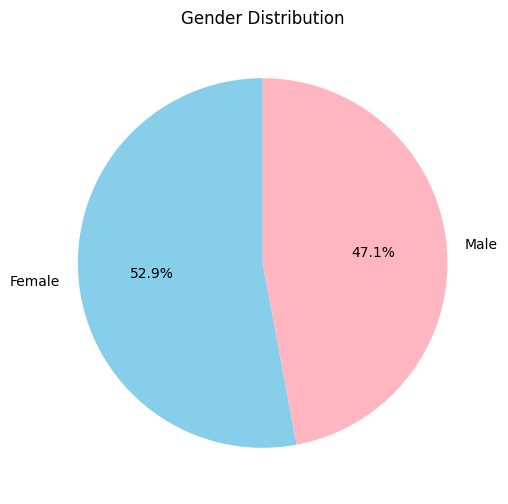

In [4]:
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "lightpink"])
plt.title("Gender Distribution")
plt.show()

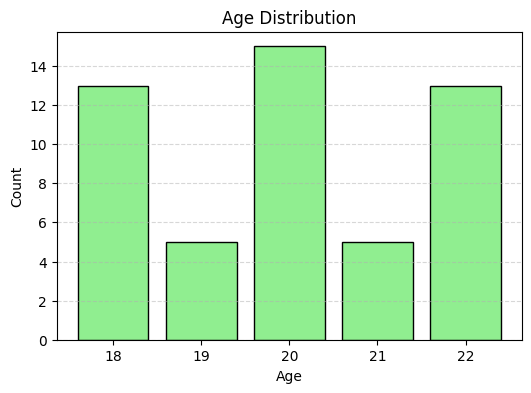

In [5]:
age_counts = df["Age"].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(age_counts.index, age_counts.values, color="lightgreen", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

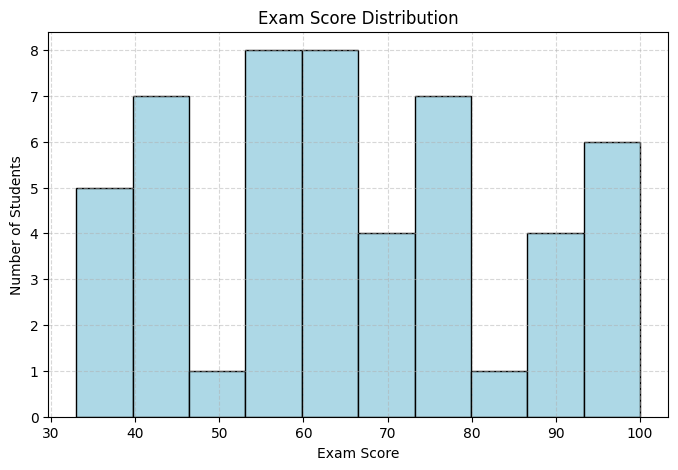

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df["Exam_Score"], bins=10, color="lightblue", edgecolor="black")
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

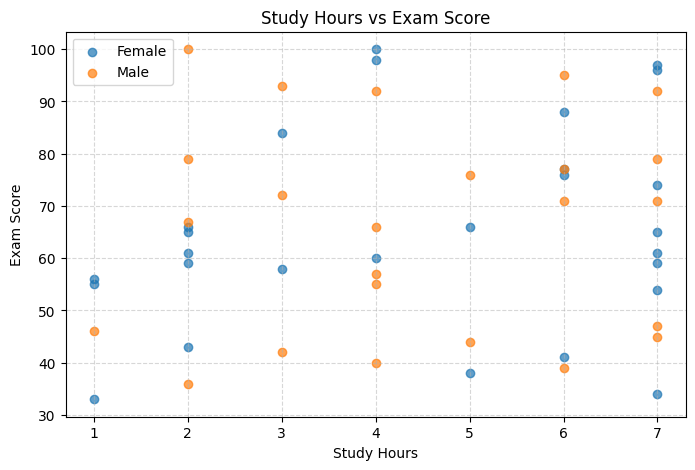

In [7]:
plt.figure(figsize=(8,5))
for gender in df["Gender"].unique():
    subset = df[df["Gender"] == gender]
    plt.scatter(subset["Study_Hours"], subset["Exam_Score"], label=gender, alpha=0.7)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

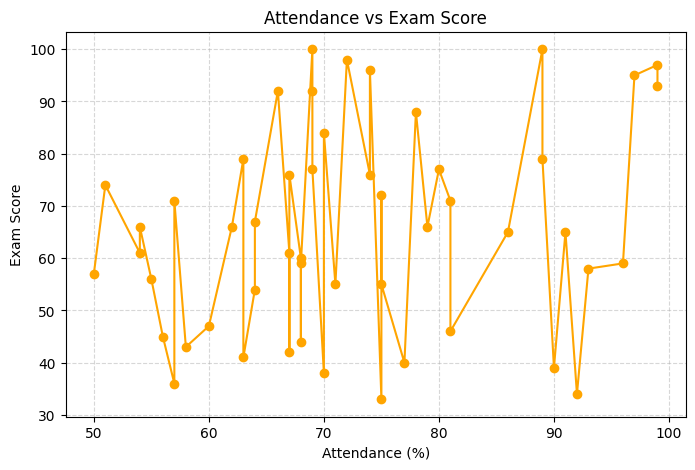

In [8]:
sorted_df = df.sort_values(by="Attendance (%)")
plt.figure(figsize=(8,5))
plt.plot(sorted_df["Attendance (%)"], sorted_df["Exam_Score"], marker='o', linestyle='-', color="orange")
plt.title("Attendance vs Exam Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Exam Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

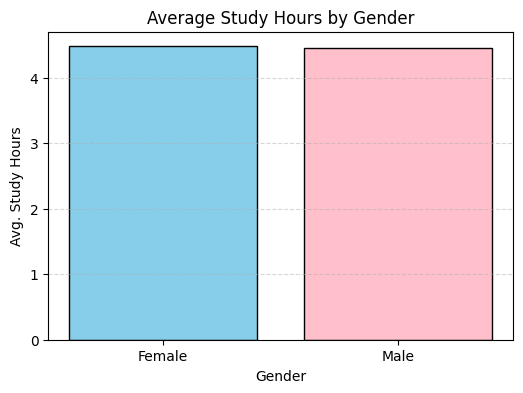

In [9]:
avg_study_hours = df.groupby("Gender")["Study_Hours"].mean()
plt.figure(figsize=(6,4))
plt.bar(avg_study_hours.index, avg_study_hours.values, color=["skyblue", "pink"], edgecolor="black")
plt.title("Average Study Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg. Study Hours")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.show()

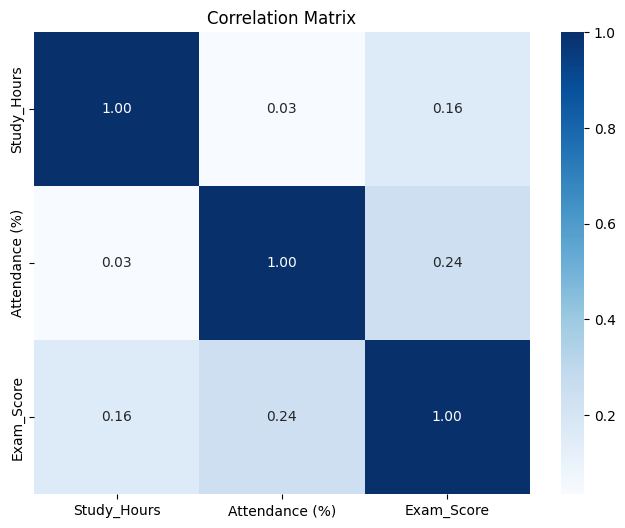

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
corr_matrix = df[["Study_Hours", "Attendance (%)", "Exam_Score"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [11]:
print("Average Exam Score:", df["Exam_Score"].mean())
print("Average Attendance:", df["Attendance (%)"].mean())
print("Average Study Hours:", df["Study_Hours"].mean())
top_students = df[df["Exam_Score"] > 90]
print("\nStudents scoring above 90:\n", top_students[["Name", "Exam_Score"]])

Average Exam Score: 65.58823529411765
Average Attendance: 72.52941176470588
Average Study Hours: 4.470588235294118

Students scoring above 90:
           Name  Exam_Score
6    Student_7          95
7    Student_8          92
10  Student_11         100
13  Student_14         100
18  Student_19          97
36  Student_37          96
39  Student_40          98
40  Student_41          92
43  Student_44          93
